In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path

def plot_difference(year1, year2, path="/home/trojern02/Meteorology2024/analysis/", cmap="RdBu"):    
    file1 = Path(path) / f"era5-{year1}.nc"
    file2 = Path(path) / f"era5-{year2}.nc"
    if not file1.exists() or not file2.exists():
        raise FileNotFoundError(f"Eine oder beide Dateien existieren nicht: {file1}, {file2}")
    
    ds1 = xr.open_dataset(file1)
    ds2 = xr.open_dataset(file2)
    diff = ds2["pvpot2"] - ds1["pvpot2"]
    
    fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.PlateCarree()})
    contour = ax.contourf(ds1.longitude, ds1.latitude, diff[0, :, :],  extend="both")
    fig.colorbar(contour, ax=ax, orientation="vertical")
    
    ax.coastlines(color='black', linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linestyle="None")
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    
    plt.title(f"Difference in PV Potential ({year1} - {year2})")
    plt.show()

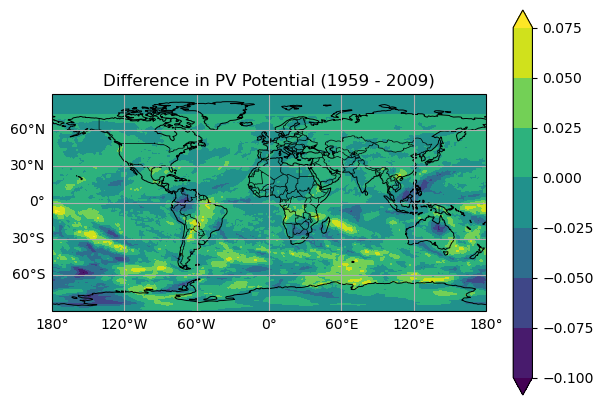

In [32]:
#### I used my path, but you can also simply add it as a third parameter
plot_difference(1959, 2009)

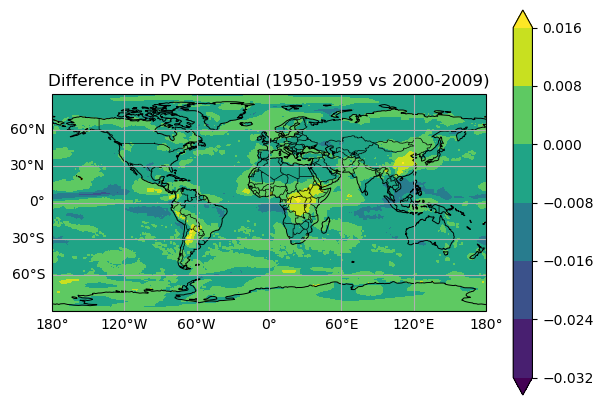

In [33]:

path= "/home/trojern02/Meteorology2024/analysis/"
def calculate_average_year_range(start_year, end_year, path):
    files = [Path(path) / f"era5-{year}.nc" for year in range(start_year, end_year + 1)]
    datasets = []
    for file in files:
        if file.exists():
            datasets.append(xr.open_dataset(file)["pvpot2"])
        else:
            print(f"Datei nicht gefunden: {file}")
    
    combined = xr.concat(datasets, dim="time")  #alle in der zeitspanne zusammenführen
    monthly_mean = combined.mean(dim="time")  
    yearly_mean = monthly_mean.mean(dim="month") 
    return yearly_mean  # 2dim (latitude, longitude)

def plot_difference_between_averages(start1, end1, start2, end2):
    avg1 = calculate_average_year_range(start1, end1, path)
    avg2 = calculate_average_year_range(start2, end2, path)
    diff_2d = avg2 - avg1  
    fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.PlateCarree()})
    contour = ax.contourf(diff_2d.longitude, diff_2d.latitude, diff_2d, extend="both")
    fig.colorbar(contour, ax=ax, orientation="vertical")
    ax.coastlines(color='black', linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linestyle="None")
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}  
    plt.title(f"Difference in PV Potential ({start1}-{end1} vs {start2}-{end2})")
    plt.show()

plot_difference_between_averages(1950, 1959, 2000, 2009)


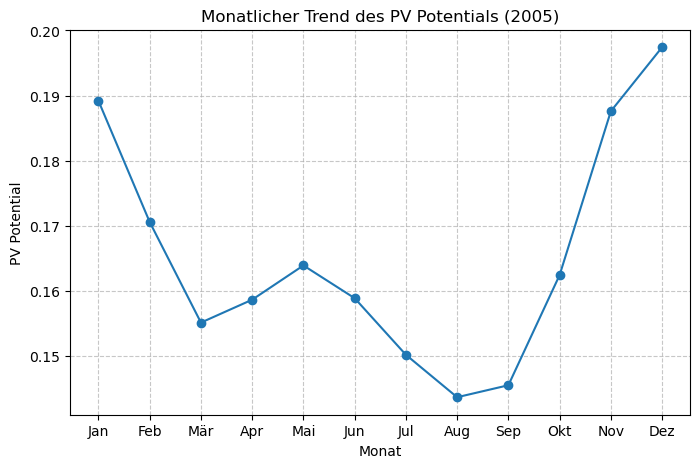

In [47]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
path= "/home/trojern02/Meteorology2024/analysis/era5-2005-monthly"

def plot_monthly_trend_from_files(year, path):
    monthly_means = []
    for month in range(1, 13):
        file = Path(path) / f"era5-{year}-{month:02d}.nc"
        if not file.exists():
            raise FileNotFoundError(f"Datei nicht gefunden: {file}")
        ds = xr.open_dataset(file)
        monthly_mean = ds["pvpot2"].mean(dim=["latitude", "longitude"])
        monthly_means.append(monthly_mean)
    monthly_mean = xr.concat(monthly_means, dim="month")
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 13), monthly_mean, marker="o")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
    plt.xlabel("Monat")
    plt.ylabel("PV Potential")
    plt.title(f"Monatlicher Trend des PV Potentials ({year})")
    plt.grid(True, linestyle="--", alpha=0.7)
    #plt.legend()
    plt.show()

plot_monthly_trend_from_files(2005,path)


In [43]:
import xarray as xr

file = "/home/trojern02/Meteorology2024/analysis/era5-2005-monthly/era5-2005-06.nc"
ds = xr.open_dataset(file)
print(ds["pvpot2"])


<xarray.DataArray 'pvpot2' (month: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
    number     int64 8B ...
  * month      (month) int64 8B 6
